### Implementing a 5 qubit Quantum Fourier Transform
This Python script demonstrates the implementation of a 5-qubit Quantum Fourier Transform (QFT) using the Qiskit library. The Quantum Fourier Transform is a fundamental quantum algorithm that plays a crucial role in quantum computing and is often used as a subroutine in various quantum algorithms.

The qft function takes a QuantumCircuit circuit and the number of qubits n as input, applying the Quantum Fourier Transform to the first n qubits in the circuit. The Qiskit library is used for quantum circuit construction, transpilation, simulation, and result visualization.

The quantum circuit is initialized with 5 qubits (n = 5), and the Quantum Fourier Transform is applied to these qubits using the qft function. The implementation of the QFT involves applying Hadamard gates (circuit.h(j)) and controlled-phase gates (circuit.cp(angle, k, j)) with varying angles.

After constructing the quantum circuit, the code simulates its execution on a quantum simulator (Aer.get_backend('qasm_simulator')). The execute function is used to run the quantum circuit, and the results are obtained using the result object. Finally, the counts of different measurement outcomes are visualized using the plot_histogram function from Qiskit's visualization module.

This script provides a practical example of quantum circuit implementation and simulation, allowing users to explore the Quantum Fourier Transform and gain insights into quantum computing concepts.

In [1]:
# !pip install qutip
# !pip install qiskit
# !pip install qiskit-aer

In [2]:
from qiskit import QuantumCircuit, transpile, Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np

In [3]:
def qft(circuit, n):
    """Apply the Quantum Fourier Transform to the first n qubits in the circuit."""
    for j in range(n):
        circuit.h(j)
        for k in range(j+1, n):
            angle = 2 * np.pi / 2**(k-j)
            circuit.cp(angle, k, j)
    circuit.measure_all()

In [4]:
# Creating a 5-qubit quantum circuit
n = 5
qc = QuantumCircuit(n)
# Applying Quantum Fourier Transform
qft(qc, n)
# Visualizing the circuit
print(qc)

        ┌───┐                                                            »
   q_0: ┤ H ├─■──────■─────────────■───────────────■─────────────────────»
        └───┘ │P(π)  │       ┌───┐ │               │                     »
   q_1: ──────■──────┼───────┤ H ├─┼────────■──────┼────────■────────────»
                     │P(π/2) └───┘ │        │P(π)  │        │       ┌───┐»
   q_2: ─────────────■─────────────┼────────■──────┼────────┼───────┤ H ├»
                                   │P(π/4)         │        │P(π/2) └───┘»
   q_3: ───────────────────────────■───────────────┼────────■────────────»
                                                   │P(π/8)               »
   q_4: ───────────────────────────────────────────■─────────────────────»
                                                                         »
meas: 5/═════════════════════════════════════════════════════════════════»
                                                                         »
«                        

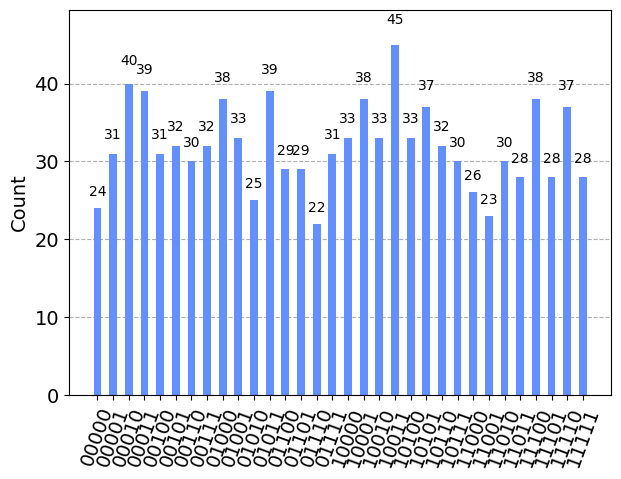

In [5]:
# Simulating and plotting the results
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)